In [12]:
# Importing panda library
import pandas as pd

# Read the CSV file with a date column in the "DD/MM/YYYY" format
df = pd.read_csv('../shbne/FIB/Mapped with NutrientsTIME.csv', parse_dates=['Date'], dayfirst=True)

# Print the first few rows of the dataframe
print(df.head())

        Date  Week No  Year   Site       Date_TAG event_type    ent  tet_ent  \
0 2021-03-18       12  2021  BHL-5  BHL-5-12-2021       base  141.0     28.0   
1 2021-03-18       12  2021     T8     T8-12-2021       base  126.0     16.0   
2 2021-03-18       12  2021    S11    S11-12-2021       base   77.0     21.0   
3 2021-03-18       12  2021   SW12   SW12-12-2021       base   20.0      0.0   
4 2021-04-09       15  2021  BHL-5  BHL-5-15-2021       base   52.0      4.0   

   tyl_ent  ecoli  Precip  Precip-1  Temp  Temp-1  TSS    DRP     TP      TN  \
0      6.0   79.0     NaN       0.0   NaN    26.3  NaN    NaN    NaN     NaN   
1      1.0   75.0     NaN       NaN   NaN     NaN  0.5  0.083  0.087  16.402   
2      2.0   10.0     NaN       NaN   NaN     NaN  0.5  0.028  0.033  18.149   
3      0.0    3.0     NaN       NaN   NaN     NaN  3.0  0.002  0.027  10.910   
4      1.0   16.0     0.0       NaN  67.4     NaN  NaN    NaN    NaN     NaN   

   Avg_Flow  
0       NaN  
1  0.00108

In [15]:
# Checking if the data has been detected properly for date and time variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        353 non-null    datetime64[ns]
 1   Week No     353 non-null    int64         
 2   Year        353 non-null    int64         
 3   Site        353 non-null    object        
 4   Date_TAG    353 non-null    object        
 5   event_type  353 non-null    object        
 6   ent         324 non-null    float64       
 7   tet_ent     324 non-null    float64       
 8   tyl_ent     331 non-null    float64       
 9   ecoli       318 non-null    float64       
 10  Precip      330 non-null    float64       
 11  Precip-1    330 non-null    float64       
 12  Temp        330 non-null    float64       
 13  Temp-1      330 non-null    float64       
 14  TSS         247 non-null    float64       
 15  DRP         247 non-null    float64       
 16  TP          247 non-null  

In [19]:
# Listing the columns for the read dataets
df.columns

Index(['Date', 'Week No', 'Year', 'Site', 'Date_TAG', 'event_type', 'ent',
       'tet_ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1', 'Temp', 'Temp-1',
       'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow'],
      dtype='object')

In [23]:
# Dropping extra time related columns and variable "event_type" and "Site"
df2=df.drop(["Week No", "Year", "Date_TAG", "event_type", "Site"], axis=1)
df2.head(10)

Date    ent  tet_ent  tyl_ent   ecoli  Precip  Precip-1  Temp  Temp-1  \
0 2021-03-18  141.0     28.0      6.0    79.0     NaN       0.0   NaN    26.3   
1 2021-03-18  126.0     16.0      1.0    75.0     NaN       NaN   NaN     NaN   
2 2021-03-18   77.0     21.0      2.0    10.0     NaN       NaN   NaN     NaN   
3 2021-03-18   20.0      0.0      0.0     3.0     NaN       NaN   NaN     NaN   
4 2021-04-09   52.0      4.0      1.0    16.0     0.0       NaN  67.4     NaN   
5 2021-04-09  888.0    125.0     39.0  1000.0     0.0       0.0  67.4    67.4   
6 2021-04-09   88.0     14.0      3.0    40.0     0.0       0.0  67.4    67.4   
7 2021-04-09    6.0      1.0      0.0     4.0     0.0       0.0  67.4    67.4   
8 2021-04-15   38.0      3.0      0.0    16.0     NaN       0.0   NaN    67.4   
9 2021-04-15  172.0      3.0      1.0   380.0     NaN       NaN   NaN     NaN   

   TSS    DRP     TP      TN  Avg_Flow  
0  NaN    NaN    NaN     NaN       NaN  
1  0.5  0.083  0.087  16.402  0.001087  
2  0.5  0.028  0.033  18.149  0.022349  
3  3.0  0.002  0.027  10.910  0.022349  
4  NaN    NaN    NaN     NaN       NaN  
5  0.5  0.081  0.085  20.973  0.012124  
6  2.0  0.015  0.021  25.343  0.009243  
7  6.0  0.001  0.031  10.290  0.073479  
8  NaN    NaN    NaN     NaN       NaN  
9  0.5  0.049  0.047  21.386  0.004176

In [41]:
df2.columns

Index(['Date', 'ent', 'tet_ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1',
       'Temp', 'Temp-1', 'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow'],
      dtype='object')

In [79]:
# For this problem, we are tryign to establish an ML model to predict the variable "tet_ent" from the other phenotypic variables only
df3 = df2[['ent', 'tyl_ent', 'ecoli','tet_ent']]
df3.head()

ent  tyl_ent  ecoli  tet_ent
0  141.0      6.0   79.0     28.0
1  126.0      1.0   75.0     16.0
2   77.0      2.0   10.0     21.0
3   20.0      0.0    3.0      0.0
4   52.0      1.0   16.0      4.0

In [94]:
# Checking null values
print(df3.isna().sum())


ent        29
tyl_ent    22
ecoli      35
tet_ent    29
dtype: int64


In [95]:
#dropping null values where ecoli or ent was not present
df4 = df3.dropna(subset=['ecoli', 'ent'])
print(df4.isna().sum())

ent        0
tyl_ent    0
ecoli      0
tet_ent    0
dtype: int64


In [96]:
#Subsetting data for ML model
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]

In [97]:
#Importing scikitlearn's train-test split module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

In [98]:
#Importing the XGBoost Regression Model library
from xgboost import XGBRegressor
xg_reg = XGBRegressor()

In [100]:
#Fitting the model on training data
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [101]:
#Extracting predictions to a variable
y_pred = xg_reg.predict(X_test)

In [103]:
y_pred

array([ 1.14234976e-01,  2.51183567e+01,  1.62706314e+02,  1.04900894e+01,
        1.35204611e+01,  2.74422264e+00,  8.50849915e+00,  2.15803790e+00,
        1.60005894e+01,  4.11276484e+00,  3.09301959e-03,  6.30827367e-01,
        9.16125031e+01,  6.76162148e+00,  5.77659726e-01,  1.60611224e+00,
        1.68961945e+02,  6.32358322e+01,  4.74116474e-01,  1.07029028e+01,
        2.02977061e+00,  6.16698027e-01, -2.33539119e-02,  1.87106967e+00,
        2.77033663e+00,  1.75558910e+01,  1.29113197e+00,  1.34016352e+01,
        2.77310282e-01,  3.19073987e+00,  9.35235202e-01,  9.37408161e+00,
        1.78176260e+00,  1.25985823e+01,  5.56197286e-01,  6.81739300e-02,
        4.36599255e+00,  1.86653748e+01,  7.22506571e+00,  7.21465528e-01,
        1.59385252e+01,  4.65708748e-02,  2.13789201e+00,  1.81671448e+01,
        2.41955185e+01,  1.55449314e+01,  6.53553104e+00,  9.50714588e+00,
        4.26936874e+01,  9.84724426e+01,  2.17736263e+01,  1.02943239e+01,
        6.91888869e-01,  

In [107]:
# Checking model performance with MSE and RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

1209.7886102460598


In [109]:
# Checking model performance with r2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9138017541278903

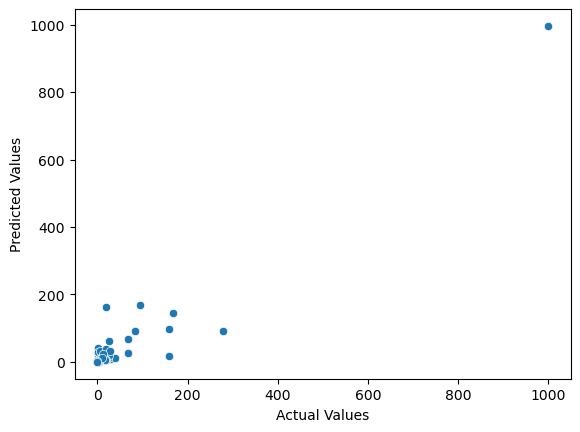

In [110]:
#PLotting the predictions

import matplotlib.pyplot as plt
import seaborn as sns

# y_true contains the true values of the target variable
# y_pred contains the predicted values of the target variable
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

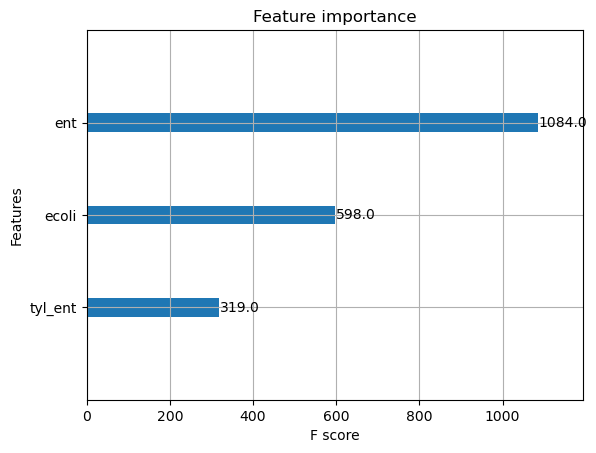

In [112]:
# EXtracting variable importance

from xgboost import plot_importance
plot_importance(xg_reg)
plt.show()

In [116]:
#Revisiting what variables were used for input
X_train.columns

Index(['ent', 'tyl_ent', 'ecoli'], dtype='object')

In [129]:
#Writing a code to ask user input, use the developed model to give instant predictions

ent = float(input("Enter value for ent: "))
tyl_ent = float(input("Enter value for tyl_ent: "))
ecoli = float(input("Enter value for ecoli: "))

# Create a DataFrame with the user input
user_input = pd.DataFrame({
    'ent': [ent],
    'tyl_ent': [tyl_ent],
    'ecoli': [ecoli]
})

# Make a prediction for the user input
prediction = xg_reg.predict(user_input)

# Print the predicted value
print("Predicted value of tet_ent is: ", prediction[0])


Enter value for ent: 5
Enter value for tyl_ent: 5
Enter value for ecoli: 5
Predicted value of tet_ent is:  11.159622
